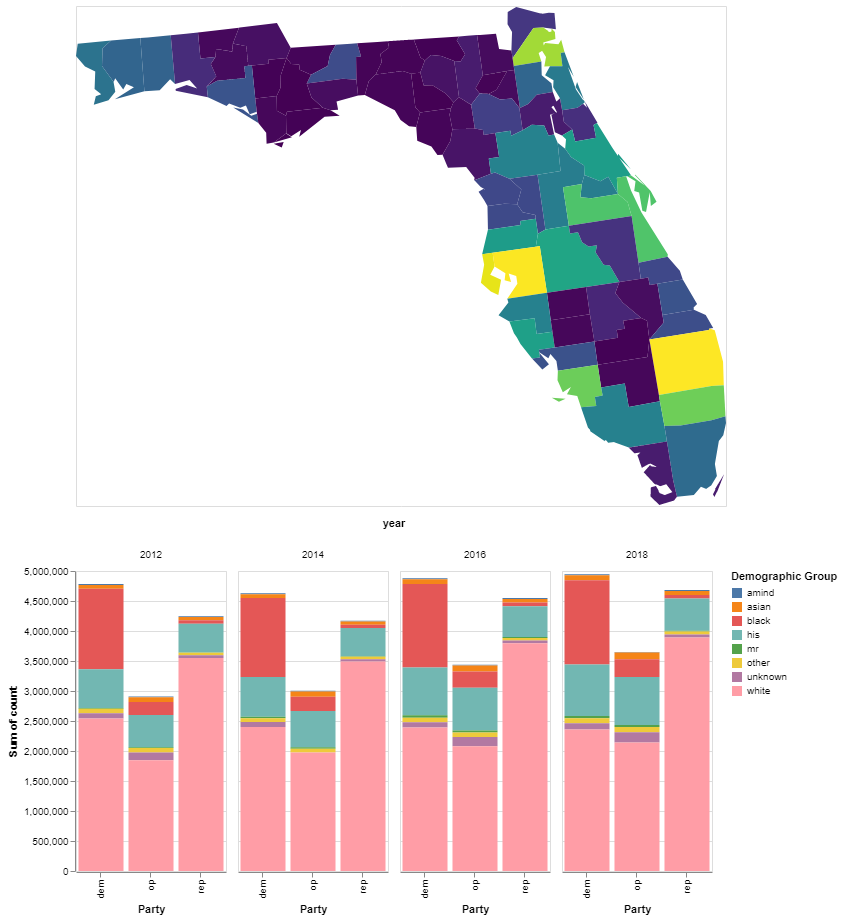

In [31]:
import altair as alt
from vega_datasets import data
from altair.expr import datum
import pandas as pd

alt.renderers.enable('notebook')
alt.data_transformers.enable('json')
bay_df = pd.read_pickle("./data.pkl")

counties = alt.topo_feature(data.us_10m.url, 'counties')

select = alt.selection_multi(empty='all', fields=['id'])

colorer = alt.condition(select,
                      alt.Color('count:Q', legend=None),
                      alt.value('lightgray'))


geo = alt.Chart(counties).mark_geoshape().encode(
    color=colorer,
    tooltip='county:N'
).transform_lookup(
    lookup = 'id',
    from_ = alt.LookupData(bay_df, 'id',['count','year','county','party','id'])
).properties(
    width=650,
    height=500
).project(
   type='albersUsa'
).add_selection(select)


stat = alt.Chart(bay_df).mark_bar().encode(
    alt.Color('group:N',title="Demographic Group"),
    alt.X('party:N',title="Party"),
    y='sum(count):Q',
    tooltip=['group:N','sum(count):Q']
).properties(
    width=150
).transform_filter(
    select
).facet(
    column = 'year:N'
)

chart = geo & stat

chart.save('chart.html')

chart